<a href="https://colab.research.google.com/github/aprise11/Team18/blob/main/Untitled21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pokemon_df = pd.read_csv('/content/Pokemon.csv')

pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


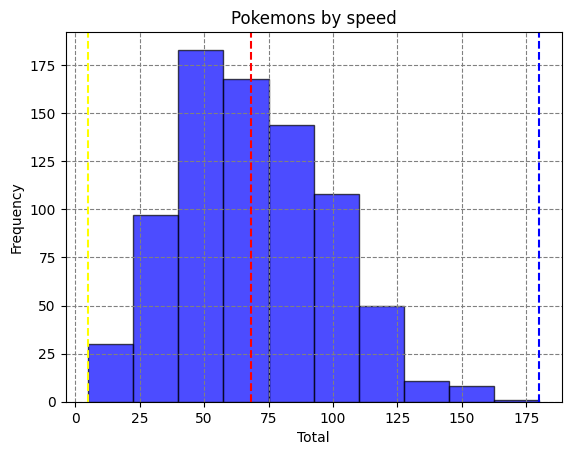

In [4]:
plt.hist(pokemon_df['Speed'], color='blue', edgecolor='black', alpha = 0.7)
plt.title('Pokemons by speed')
plt.xlabel('Total')
plt.ylabel('Frequency')

avg_total = pokemon_df['Speed'].mean()
max_total = pokemon_df['Speed'].max()
min_total = pokemon_df['Speed'].min()

plt.axvline(pokemon_df['Speed'].mean(), linestyle='dashed', color='red', label=f'Avg: {avg_total}')
plt.axvline(pokemon_df['Speed'].min(), linestyle='dashed', color='yellow', label=f'Min: {min_total}')
plt.axvline(pokemon_df['Speed'].max(), linestyle='dashed', color='blue', label=f'Max: {max_total}')
plt.grid(linestyle='--', color='grey')

plt.show()

Text(0, 0.5, 'Defense')

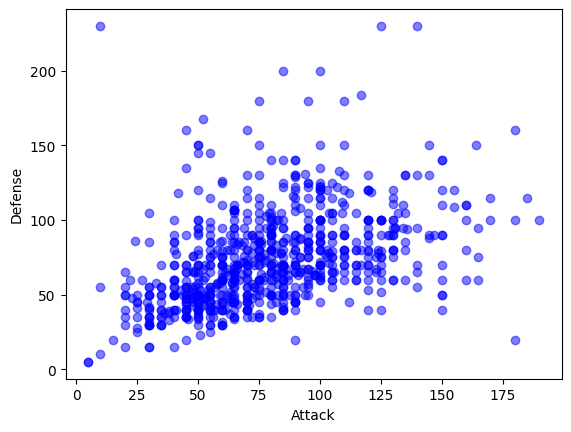

In [7]:
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color = 'blue', alpha = 0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

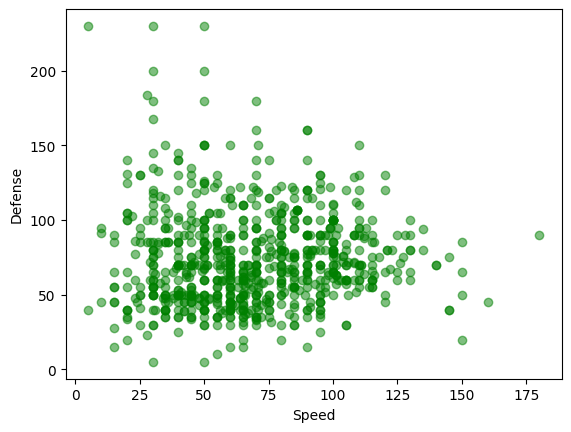

In [10]:
plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color = 'green', alpha = 0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')

Text(0, 0.5, 'Defense')

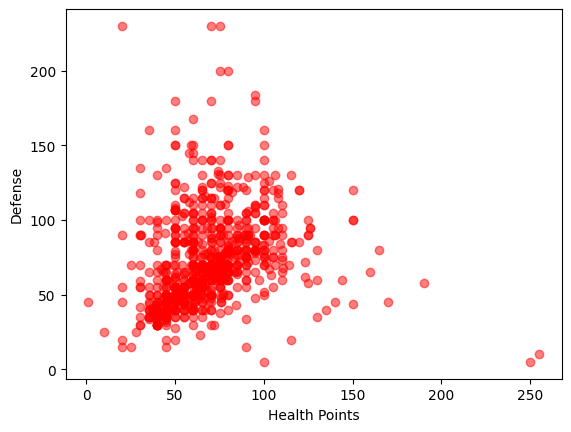

In [13]:
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color = 'red', alpha = 0.5)
plt.xlabel('Health Points')
plt.ylabel('Defense')

Pearson correlation

In [ ]:
# Result of this correlation is between -1 (perfect negative relationship) and 1(perfect positive relationship).

In [16]:
correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation3 = pokemon_df['HP'].corr(pokemon_df['Defense'])
print(correlation1)
print(correlation2)
print(correlation3)

0.4386870551184892
0.015226598088597448
0.2396223188467258


In [18]:
numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [27]:
target_column = 'Attack'
correlation_results = {}
for column in numeric_columns.columns:
  if column != target_column:
    correlation_results[column] = pokemon_df[target_column].corr(pokemon_df[column])
correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

Correlation matrix

In [30]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


In [32]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

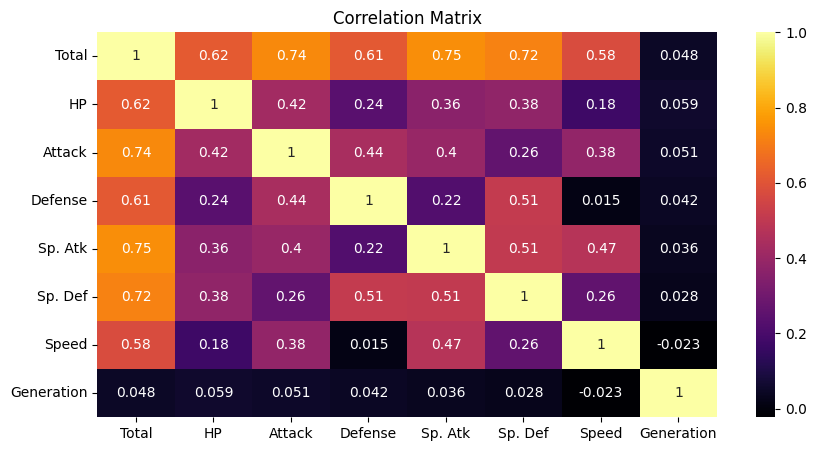

In [37]:
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap = "inferno")
plt.title('Correlation Matrix')

Linear regression

<Axes: xlabel='Attack', ylabel='Defense'>

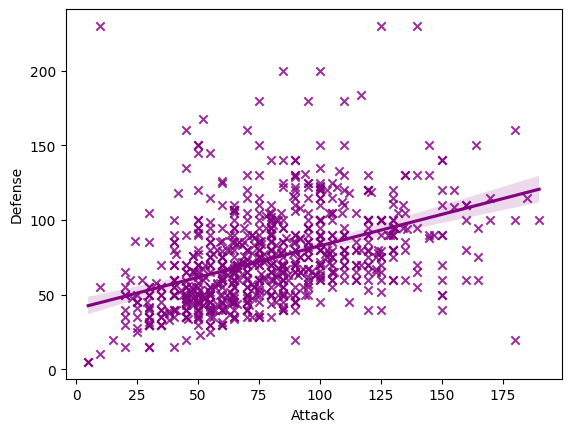

In [40]:
sns.regplot(x = 'Attack', y = 'Defense', data = pokemon_df, marker='x', color='purple')

Pearson correlation coefficient: 0.015226598088597448


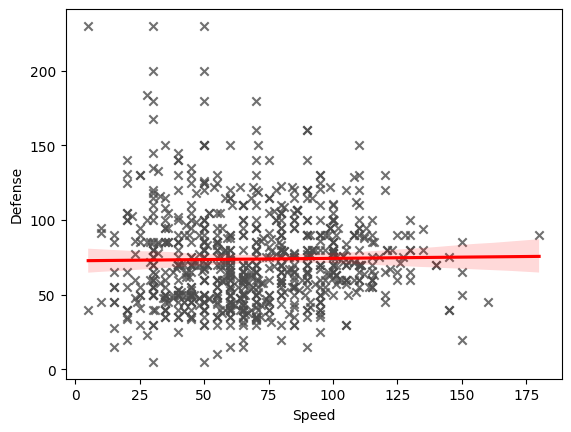

In [47]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
1. Create two DataFrame Grass and Water
2. Create the regression plots for each (Grass and Water)
3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)
4. Explain to each other what do you see and what it means.


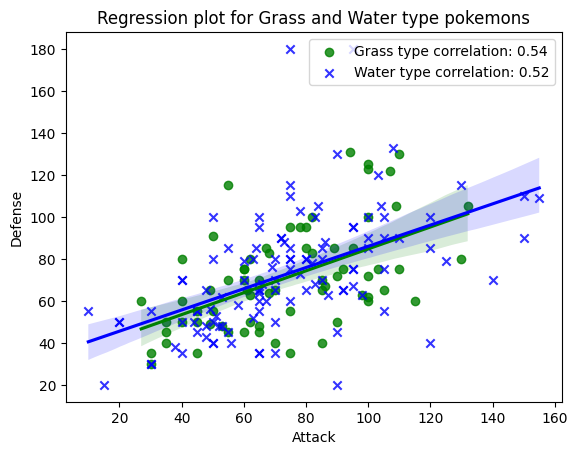

In [63]:
df_grass = pokemon_df[pokemon_df['Type 1']=='Grass']
df_water = pokemon_df[pokemon_df['Type 1']=='Water']

corr_grass = df_grass['Attack'].corr(df_grass['Defense']).round(2)
corr_water = df_water['Attack'].corr(df_water['Defense']).round(2)

sns.regplot(
    data=df_grass, x='Attack', y="Defense",
     marker="o", color = 'green', label = f'Grass type correlation: {corr_grass}')

sns.regplot(
    data=df_water, x='Attack', y="Defense",
     marker="x", color = 'blue', label = f'Water type correlation: {corr_water}')

plt.title('Regression plot for Grass and Water type pokemons')
plt.legend()